In [1]:
%%bash
pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt  # install dependencies

## Model Description

<img width="800" alt="YOLOv5 Model Comparison" src="https://github.com/ultralytics/yolov5/releases/download/v1.0/model_comparison.png">
&nbsp;

[YOLOv5](https://ultralytics.com/yolov5) 🚀 is a family of compound-scaled object detection models trained on the COCO dataset, and includes simple functionality for Test Time Augmentation (TTA), model ensembling, hyperparameter evolution, and export to ONNX, CoreML and TFLite.

|Model |size<br><sup>(pixels) |mAP<sup>val<br>0.5:0.95 |mAP<sup>test<br>0.5:0.95 |mAP<sup>val<br>0.5 |Speed<br><sup>V100 (ms) | |params<br><sup>(M) |FLOPS<br><sup>640 (B)
|---   |---  |---        |---         |---             |---                |---|---              |---
|[YOLOv5s6](https://github.com/ultralytics/yolov5/releases)   |1280 |43.3     |43.3     |61.9     |**4.3** | |12.7  |17.4
|[YOLOv5m6](https://github.com/ultralytics/yolov5/releases)   |1280 |50.5     |50.5     |68.7     |8.4     | |35.9  |52.4
|[YOLOv5l6](https://github.com/ultralytics/yolov5/releases)   |1280 |53.4     |53.4     |71.1     |12.3    | |77.2  |117.7
|[YOLOv5x6](https://github.com/ultralytics/yolov5/releases)   |1280 |**54.4** |**54.4** |**72.0** |22.4    | |141.8 |222.9
|[YOLOv5x6](https://github.com/ultralytics/yolov5/releases) TTA |1280 |**55.0** |**55.0** |**72.0** |70.8 | |-  |-

<details>
  <summary>Table Notes (click to expand)</summary>

  * AP<sup>test</sup> denotes COCO [test-dev2017](http://cocodataset.org/#upload) server results, all other AP results denote val2017 accuracy.
  * AP values are for single-model single-scale unless otherwise noted. **Reproduce mAP** by `python test.py --data coco.yaml --img 640 --conf 0.001 --iou 0.65`
  * Speed<sub>GPU</sub> averaged over 5000 COCO val2017 images using a GCP [n1-standard-16](https://cloud.google.com/compute/docs/machine-types#n1_standard_machine_types) V100 instance, and includes FP16 inference, postprocessing and NMS. **Reproduce speed** by `python test.py --data coco.yaml --img 640 --conf 0.25 --iou 0.45`
  * All checkpoints are trained to 300 epochs with default settings and hyperparameters (no autoaugmentation).
  * Test Time Augmentation ([TTA](https://github.com/ultralytics/yolov5/issues/303)) includes reflection and scale augmentation. **Reproduce TTA** by `python test.py --data coco.yaml --img 1536 --iou 0.7 --augment`

</details>

<p align="left"><img width="800" src="https://github.com/ultralytics/yolov5/releases/download/v1.0/model_plot.png"></p>

<details>
  <summary>Figure Notes (click to expand)</summary>

  * GPU Speed measures end-to-end time per image averaged over 5000 COCO val2017 images using a V100 GPU with batch size 32, and includes image preprocessing, PyTorch FP16 inference, postprocessing and NMS.
  * EfficientDet data from [google/automl](https://github.com/google/automl) at batch size 8.
  * **Reproduce** by `python test.py --task study --data coco.yaml --iou 0.7 --weights yolov5s6.pt yolov5m6.pt yolov5l6.pt yolov5x6.pt`

</details>

## Load From PyTorch Hub


This example loads a pretrained **YOLOv5s** model and passes an image for inference. YOLOv5 accepts **URL**, **Filename**, **PIL**, **OpenCV**, **Numpy** and **PyTorch** inputs, and returns detections in **torch**, **pandas**, and **JSON** output formats. See our [YOLOv5 PyTorch Hub Tutorial](https://github.com/ultralytics/yolov5/issues/36) for details.

In [2]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5x', pretrained=True)

# Images
imgs = ['https://ultralytics.com/images/zidane.jpg']  # batch of images

# Inference
results = model(imgs)

# Results
results.print()
results.save()  # or .show()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0]  # img1 predictions (pandas)
#      xmin    ymin    xmax   ymax  confidence  class    name
# 0  749.50   43.50  1148.0  704.5    0.874023      0  person
# 1  433.50  433.50   517.5  714.5    0.687988     27     tie
# 2  114.75  195.75  1095.0  708.0    0.624512      0  person
# 3  986.00  304.00  1028.0  420.0    0.286865     27     tie

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-10-19 Python-3.7.15 torch-1.12.1+cu113 CPU



  0%|          | 0.00/166M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 720x1280 3 persons, 2 ties
Speed: 420.9ms pre-process, 2399.7ms inference, 22.7ms NMS per image at shape (1, 3, 384, 640)
Saved 1 image to runs/detect/exp


xmin        ymin         xmax        ymax  confidence  class    name
0   746.699097   41.938354  1145.124146  710.435425    0.943767      0  person
1   116.114075  199.385376  1066.704346  711.959290    0.918710      0  person
2   433.970612  434.957642   524.817871  717.941650    0.882575     27     tie
3  1091.592651  325.928741  1279.609985  717.495117    0.374367      0  person
4   990.587585  308.062164  1035.410889  413.162933    0.364091     27     tie

In [9]:
import cv2 as cv
input_img = cv.imread('/content/drive/MyDrive/test/3.png')
result = model(input_img)

In [10]:
import numpy as np
res = np.array(result.pandas().xyxy[0])
res

array([[495.2891845703125, 211.8329620361328, 883.380615234375, 480.4956970214844, 0.9467628598213196, 0, 'person'],
       [205.37144470214844, 81.18719482421875, 460.6175537109375, 314.58184814453125, 0.9379705190658569, 0, 'person'],
       [489.3775329589844, 17.764623641967773, 681.69384765625, 239.0265350341797, 0.902516782283783, 0, 'person'],
       [178.31053161621094, 254.0598602294922, 465.9384765625, 451.9388122558594, 0.8255296349525452, 0, 'person'],
       [197.4204559326172, 439.0030212402344, 504.7006530761719, 639.3485107421875, 0.7752645611763, 0, 'person']], dtype=object)

In [11]:
res_img = input_img.copy()
for xmin, ymin, xmax, ymax, confidence, label, name in res:
  xmin = int(xmin)
  xmax = int(xmax)
  ymin = int(ymin)
  ymax = int(ymax)
  cv.rectangle(res_img,(xmin,ymin),(xmax,ymax),(0,255,0),3)
  # cv.putText(img, str(label), (xmin, ymin - 5), cv.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255))

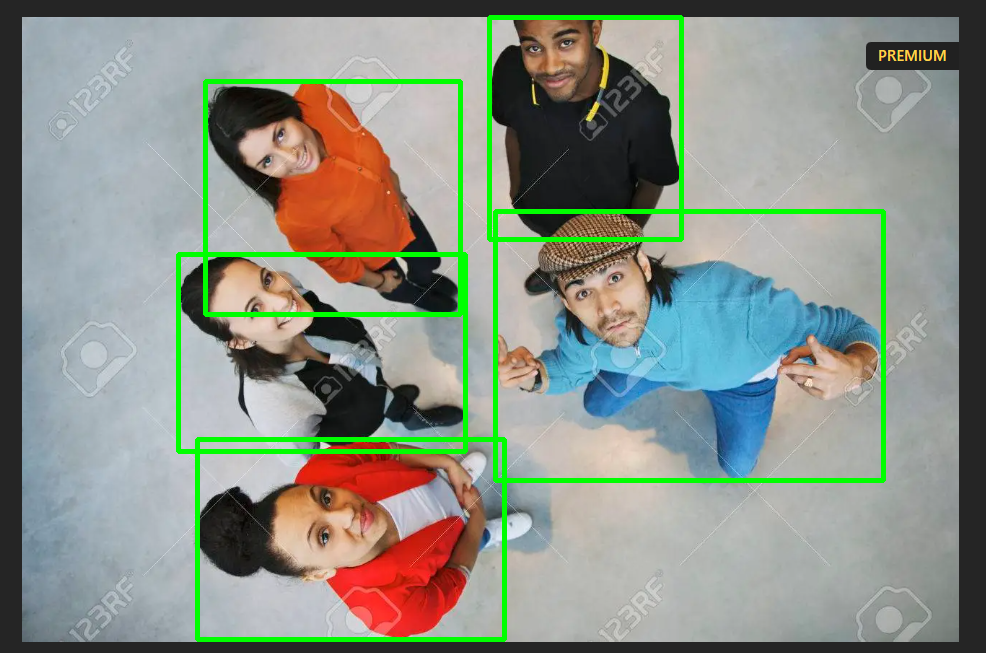

In [12]:
from google.colab.patches import cv2_imshow
cv2_imshow(res_img)

In [ ]:
cropped_imgs = []
for xmin, ymin, xmax, ymax, confidence, label, name in res:
  if(label==0):
    crop_img = input_img[int(ymin):int(ymax), int(xmin):int(xmax)]
    cropped_imgs.append(crop_img)

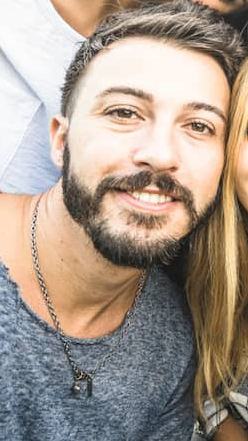

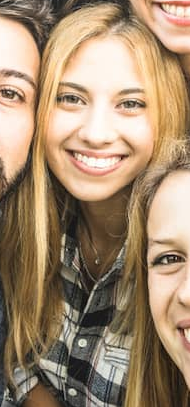

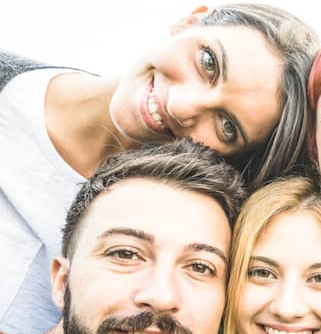

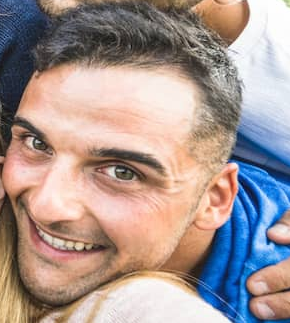

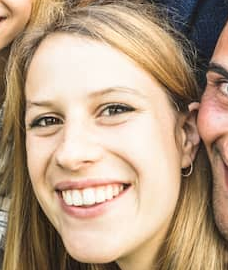

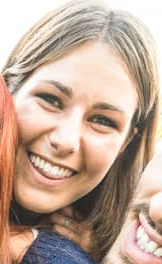

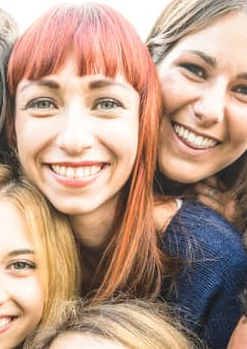

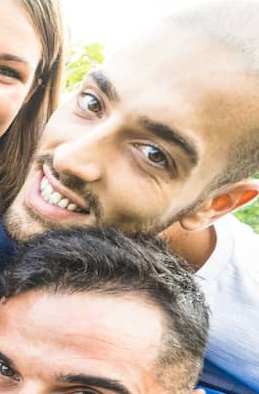

In [ ]:
for crop_img in cropped_imgs:
  cv2_imshow(crop_img)

In [ ]:
!pip install face-recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 1.3 MB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=258ce4b51b9309a4f92e9c1ce0dddb4331d95b2fa6b94836501a96f4c69e97af
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
faces = []
import face_recognition
for img in cropped_imgs:
  coords = face_recognition.face_locations(img, number_of_times_to_upsample = 0, model = 'cnn')
  print(len(coords))
  if(coords):
    top, right, bottom, left = coords[0]
    faces.append(img[top:bottom, left:right])

RuntimeError: ignored

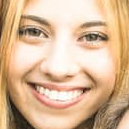

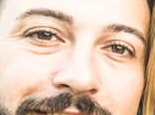

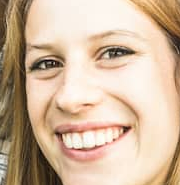

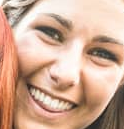

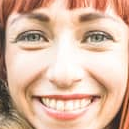

In [ ]:
for face in faces:
  cv2_imshow(face)

In [ ]:
face_cascade = cv.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

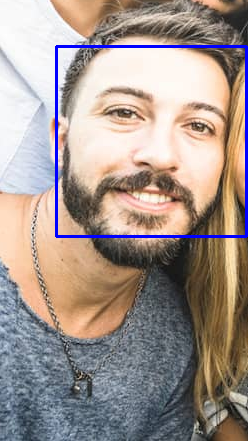

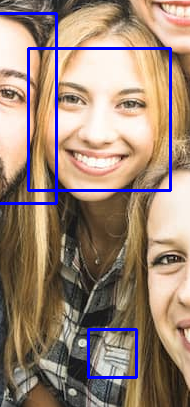

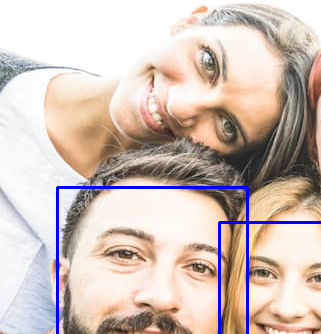

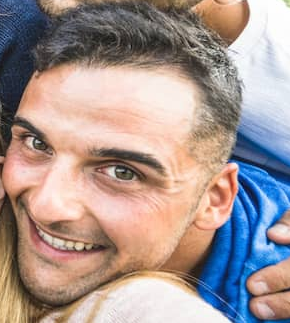

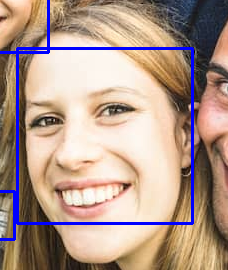

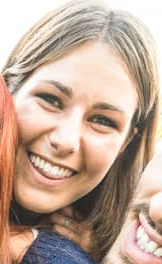

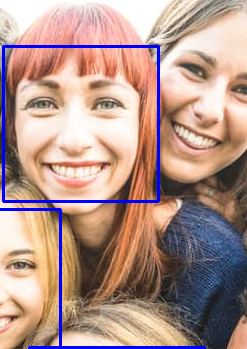

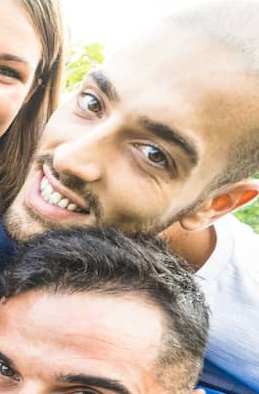

In [ ]:
for img in cropped_imgs:
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        cv.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    # Display
    cv2_imshow(img)

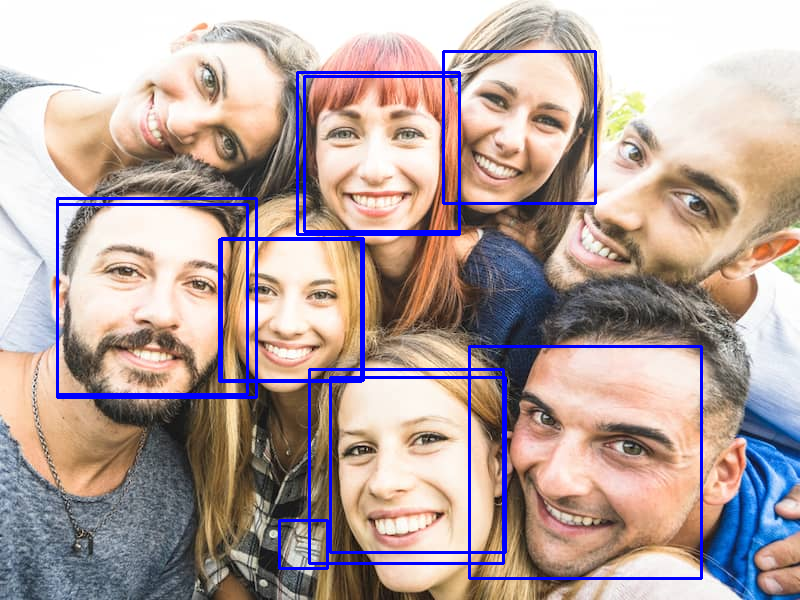

In [ ]:
fd_img= input_img.copy()
gray = cv.cvtColor(fd_img, cv.COLOR_BGR2GRAY)
    # Detect the faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    # Draw the rectangle around each face
for (x, y, w, h) in faces:
    cv.rectangle(fd_img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    # Display
cv2_imshow(fd_img)

In [ ]:
# from imutils.video import VideoStream

# WEBCAM_IP = 'http://172.31.16.200:8080/video'
# vs = VideoStream(src=0).start()
# while True:
#   frame = vs.read()
#   cv2_imshow(frame)

# while True:
#   frame = vs.read()
#   result = model(frame)
#   res = np.array(result.pandas().xyxy[0])
#   for xmin, ymin, xmax, ymax, confidence, label, name in res:
#     xmin = int(xmin)
#     xmax = int(xmax)
#     ymin = int(ymin)
#     ymax = int(ymax)
#     cv.rectangle(frame,(xmin,ymin),(xmax,ymax),(0,255,0),3)
#     cv.putText(frame, str(label), (xmin, ymin - 5), cv.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255))
#     cv2_imshow(frame)

## Citation

[![DOI](https://zenodo.org/badge/264818686.svg)](https://zenodo.org/badge/latestdoi/264818686)


## Contact


**Issues should be raised directly in https://github.com/ultralytics/yolov5.** For business inquiries or professional support requests please visit [https://ultralytics.com](https://ultralytics.com) or email Glenn Jocher at [glenn.jocher@ultralytics.com](mailto:glenn.jocher@ultralytics.com).


&nbsp;

In [ ]:
!pip3 install face-recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install dlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import face_recognition

# make a list of all the available images
images = os.listdir('/content/images')

# load your image
image_to_be_matched = face_recognition.load_image_file('/content/obama.jpg')

# encoded the loaded image into a feature vector
# image_to_be_matched_encoded = face_recognition.face_encodings(
    # image_to_be_matched)[0]

# iterate over each image
# for image in images:
#     # load the image
#     current_image = face_recognition.load_image_file("images/" + image)
#     # encode the loaded image into a feature vector
#     current_image_encoded = face_recognition.face_encodings(current_image)[0]
#     # match your image with the image and check if it matches
#     result = face_recognition.compare_faces(
#         [image_to_be_matched_encoded], current_image_encoded)
#     # check if it was a match
#     if result[0] == True:
#         print ("Matched: " + image)

In [ ]:
face_recognition.face_encodings(
    image_to_be_matched)

In [ ]:
len(image_to_be_matched)

1137